# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import random
from pprint import pprint
from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
file_df = pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Performing a series of successive API calls and storing the data in an empty list

url = "http://api.openweathermap.org/data/2.5/weather?"


city_data = []

for index, city in enumerate(cities):
    query_url = url + "appid=" + weather_api_key + "&q=" + city+  "&units=imperial"
    response = requests.get(query_url).json()
    city_data.append(response)

In [12]:
# Perform a weather check on each city using the data from the new list above 

# Printing the log file as each data is being processed

print("Beginning Data Retrieval")     
print("-----------------------------")

clean_data = []

for index, data in enumerate(city_data):
    try:
        data['name']
        clean_data.append(data)
    except KeyError:
        continue
        
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Export the city data into a csv file

city_id = []
city_name = []
cloud_data = []
country = []
date = []
humidity = []
lat_data = []
lon_data = []
temp_data = []
speed_data = []


for index, data in enumerate(clean_data):
    city_id.append(index)
    city_name.append(data['name'])
    cloud_data.append(data['clouds']['all'])
    country.append(data['sys']['country'])
    date.append(data['dt'])
    humidity.append(data['main']['humidity'])
    lat_data.append(data['coord']['lat'])
    lon_data.append(data['coord']['lon'])
    temp_data.append(data['main']['temp_max'])
    speed_data.append(data['wind']['speed'])

# Creating the new city DataFrame 
    
city_df = pd.DataFrame({"City ID": city_id, "City": city_name, "Cloudiness": cloud_data, "Country": country,
                       "Date": date, "Humidity": humidity, "Latitude": lat_data, "Longitude": lon_data,
                       "Max Temp": temp_data, "Wind Speed": speed_data})

# Exporting the city DataFrame into a csv file

city_date_file = city_df.to_csv("../output_data/city_df.csv", index=False)

In [14]:
# Displaying the DataFrame

new_file = pd.read_csv("../output_data/city_df.csv")

del new_file['City ID']

new_file.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kaitangata,52,NZ,1604261772,67,-46.28,169.85,51.01,8.99
1,Vanimo,99,PG,1604261455,81,-2.67,141.30,78.71,4.74
2,Qaanaaq,0,GL,1604261640,74,77.48,-69.36,1.08,7.56
3,Rikitea,77,PF,1604261494,86,-23.12,-134.97,74.55,22.30
4,Vardø,75,NO,1604261772,86,70.37,31.11,39.20,26.40


In [15]:

new_file.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Latitude      float64
Longitude     float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [15]:
# Create blank columns for necessary fields
new_city1["Lat"] = ""
new_city1["Lng"] = ""

# Counter
row_count = 0

# Loop through and grab the lat/lng using Google maps
for index, row in new_city1.iterrows():
    
    # Create endpoint URL
    params = {
        "address": row["City Name"],
        "key": g_key
    }
    target_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count += 1
    
    # Run requests to grab the JSON at the requested URL
    city_location = requests.get(target_url, params=params).json()
    
    # Append the lat/lng to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        city_lat = city_location["results"][0]["geometry"]["location"]["lat"]
        city_lng = city_location["results"][0]["geometry"]["location"]["lng"]
        
        new_city1.set_value(index, "Lat", city_lat)
        new_city1.set_value(index, "Lng", city_lng)
        
    except:
        print("Error with city data. Skipping")
        continue
        
# Visualize
new_city1.head()

Now retrieving city # 0
https://maps.googleapis.com/maps/api/geocode/json


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retrieving city # 1
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 2
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 3
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 4
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 5
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 6
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 7
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 8
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 9
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 10
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 11
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 12
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 13
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 14
https://m

Now retrieving city # 109
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 110
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 111
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 112
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 113
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 114
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 115
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 116
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 117
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 118
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 119
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 120
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 121
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 217
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 218
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 219
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 220
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 221
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 222
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 223
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 224
https://maps.googleapis.com/maps/api/geocode/json
Error with city data. Skipping
Now retrieving city # 225
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 226
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 227
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 228
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 229
https://maps.googleapis.com/map

Now retrieving city # 326
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 327
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 328
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 329
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 330
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 331
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 332
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 333
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 334
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 335
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 336
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 337
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 338
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 433
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 434
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 435
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 436
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 437
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 438
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 439
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 440
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 441
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 442
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 443
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 444
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 445
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 540
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 541
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 542
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 543
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 544
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 545
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 546
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 547
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 548
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 549
https://maps.googleapis.com/maps/api/geocode/json


,ran_lats,ran_lngs,City Name,Country,Lat,Lng
0,-57.630529,112.752709,Albany,AU,42.6526,-73.7562
1,-26.602812,146.528812,Roma,AU,36.0765,-95.9035
2,-42.153764,2.377626,Cape Town,ZA,-33.9249,18.4241
3,38.617734,99.511133,Zhangye,CN,38.9259,100.45
4,-28.077011,-24.101411,Vila Velha,BR,-20.3478,-40.295


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Converting Humidity data series to float

new_file['Humidity'] = new_file['Humidity'].astype(float)
new_file['Humidity'].dtypes

dtype('float64')

In [18]:
humidity_file = new_file.loc[:, ['Humidity']]
humidity_file

,Humidity
0,67.0
1,81.0
2,74.0
3,86.0
4,86.0
5,88.0
6,88.0
7,62.0
8,69.0
9,90.0


In [19]:
# Showing the cities where the humidity > 100%
# There were none

new_file[new_file["Humidity"]> 100]

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = new_file[new_file["Humidity"]<= 100]
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kaitangata,52,NZ,1604261772,67.0,-46.28,169.85,51.01,8.99
1,Vanimo,99,PG,1604261455,81.0,-2.67,141.30,78.71,4.74
2,Qaanaaq,0,GL,1604261640,74.0,77.48,-69.36,1.08,7.56
3,Rikitea,77,PF,1604261494,86.0,-23.12,-134.97,74.55,22.30
4,Vardø,75,NO,1604261772,86.0,70.37,31.11,39.20,26.40


In [21]:
# Extract relevant fields from the data frame
clean_city = clean_city_data["City"]
clean_lat = clean_city_data["Latitude"]
clean_lng = clean_city_data["Longitude"]
clean_maxtemp = clean_city_data["Max Temp"]
clean_hum = clean_city_data["Humidity"]
clean_cloud = clean_city_data["Cloudiness"]
clean_windspeed = clean_city_data["Wind Speed"]
clean_country = clean_city_data["Country"]
clean_date = clean_city_data["Date"]

# Export the City_Data into a csv
clean_city_data.index.names = ["City ID"]
clean_city_data_file = clean_city_data.to_csv("../output_data/clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
# Create a function for the following scatter plots
def plot(x_values, y_values):    
    plt.figure(figsize=(8,5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.tight_layout()
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.savefig(savefile)
    plt.show()

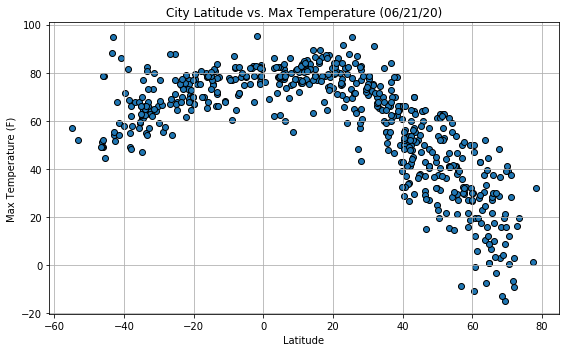

In [24]:
# Latitude vs. Temperature Plot

x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
title = "City Latitude vs. Max Temperature (06/21/20)"
savefile = "../output_data/Latitude vs. Temperature Plot.png"

plot(x_values, y_values)

## Latitude vs. Humidity Plot

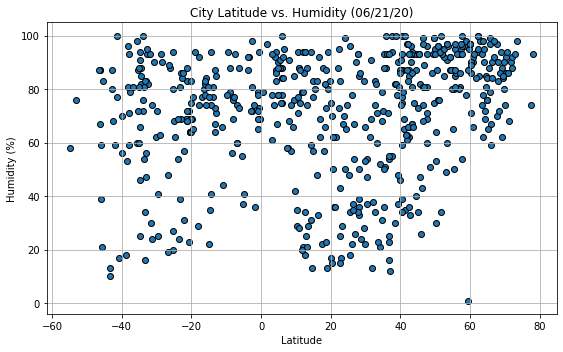

In [25]:
# Latitude vs. Humidity Plot

x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity (%)"
title = "City Latitude vs. Humidity (06/21/20)"
savefile = "../output_data/Latitude vs. Humidity Plot.png"

plot(x_values, y_values)


## Latitude vs. Cloudiness Plot

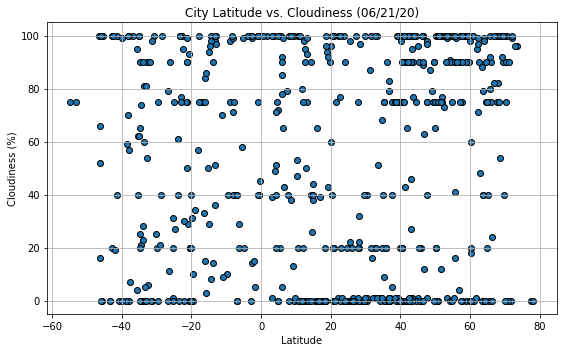

In [26]:
# Latitude vs. Cloudiness Plot

x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
title = "City Latitude vs. Cloudiness (06/21/20)"
savefile = "../output_data/Latitude vs. Cloudiness Plot.png"

plot(x_values, y_values)

## Latitude vs. Wind Speed Plot

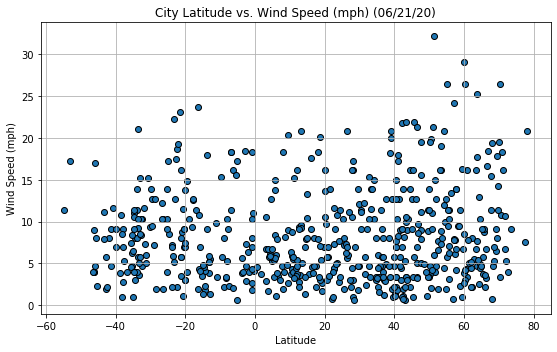

In [27]:
# Latitude vs. Wind Speed Plot

x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
title = "City Latitude vs. Wind Speed (mph) (06/21/20)"
savefile = "../output_data/Latitude vs. Wind Speed Plot.png"

plot(x_values, y_values)

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.tight_layout()
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The rvalue is: {round((rvalue), 5)}')
    print(f'The r-squared is: {round((rvalue**2), 5)}')
    plt.annotate(line_eq, (0,35), color="red", fontsize=15)
    plt.savefig(savefile)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northhem_data = new_file[new_file["Latitude"]> 0]
southhem_data = new_file[new_file["Latitude"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: -0.8475
The r-squared is: 0.71826


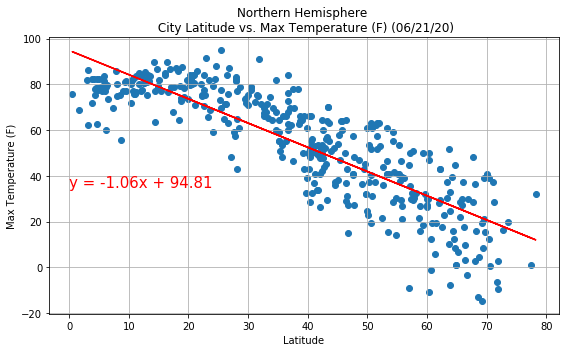

In [30]:
# Northern Hemisphere - Latitude vs. Max Temperature Linear Regression

x_values = northhem_data["Latitude"]
y_values = northhem_data["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
title = "Northern Hemisphere \n City Latitude vs. Max Temperature (F) (06/21/20)"
savefile = "../output_data/Northern Hemisphere - Latitude vs. Max Temperature Linear Regression.png"

plot(x_values, y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.6019
The r-squared is: 0.36228


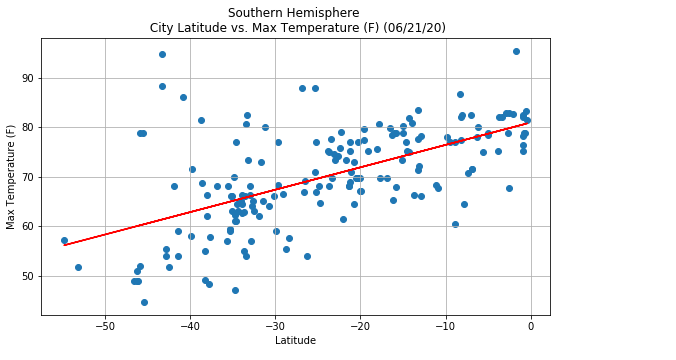

In [31]:
# Southern Hemisphere - Latitude vs. Max Temperature Linear Regression

x_values = southhem_data["Latitude"]
y_values = southhem_data["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
title = "Southern Hemisphere \n City Latitude vs. Max Temperature (F) (06/21/20)"
savefile = "../output_data/Southern Hemisphere - Latitude vs. Max Temperature Linear Regression.png"

plot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.29812
The r-squared is: 0.08888


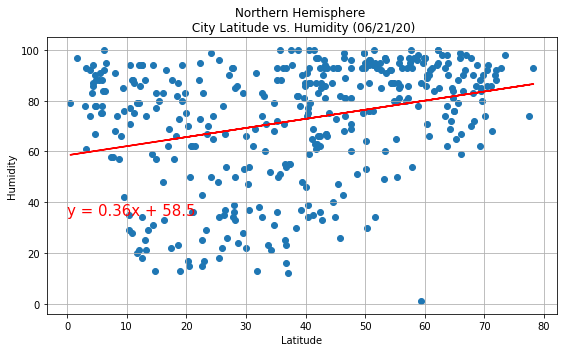

In [32]:
# Northern Hemisphere - Latitude vs. Humidity Linear Regression

x_values = northhem_data["Latitude"]
y_values = northhem_data["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "Northern Hemisphere \n City Latitude vs. Humidity (06/21/20)"
savefile = "../output_data/Northern Hemisphere - Latitude vs. Humidity Linear Regression.png"

plot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.105
The r-squared is: 0.01102


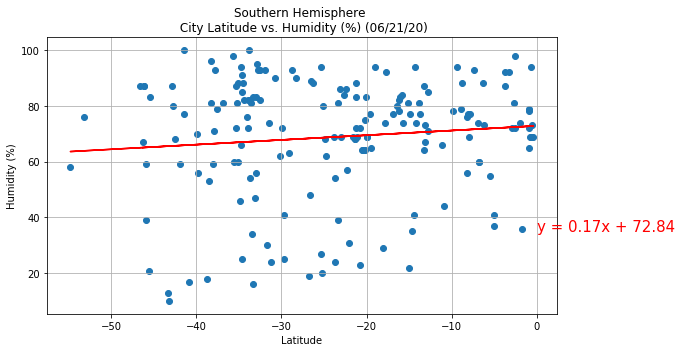

In [33]:
# Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression

x_values = southhem_data["Latitude"]
y_values = southhem_data["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity (%)"
title = "Southern Hemisphere \n City Latitude vs. Humidity (%) (06/21/20)"
savefile = "../output_data/Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression.png"

plot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.16402
The r-squared is: 0.0269


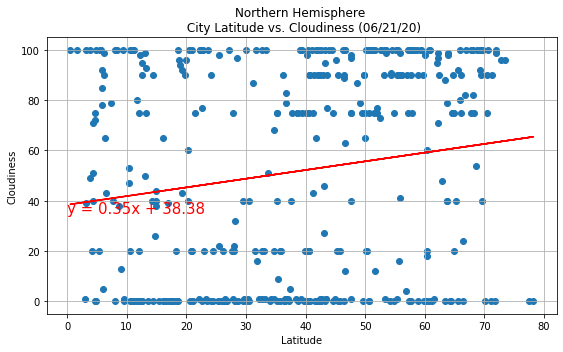

In [34]:
# Northern Hemisphere - Latitude vs. Cloudiness Linear Regression

x_values = northhem_data["Latitude"]
y_values = northhem_data["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "Northern Hemisphere \n City Latitude vs. Cloudiness (06/21/20)"
savefile = "../output_data/Northern Hemisphere - Latitude vs. Cloudiness Linear Regression.png"

plot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.10899
The r-squared is: 0.01188


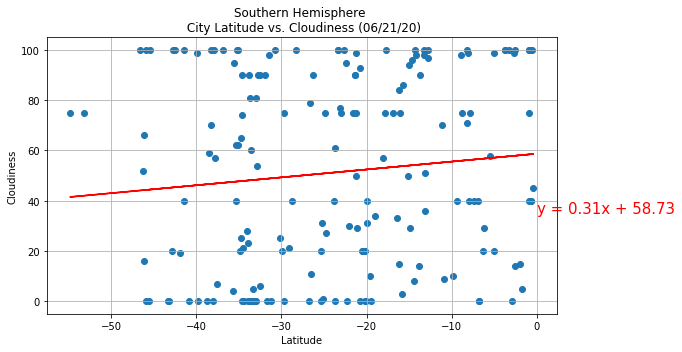

In [35]:
# Southern Hemisphere - Latitude vs. Cloudiness Linear Regression

x_values = southhem_data["Latitude"]
y_values = southhem_data["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "Southern Hemisphere \n City Latitude vs. Cloudiness (06/21/20)"
savefile = "../output_data/Southern Hemisphere - Latitude vs. Cloudiness Linear Regression.png"

plot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.18592
The r-squared is: 0.03457


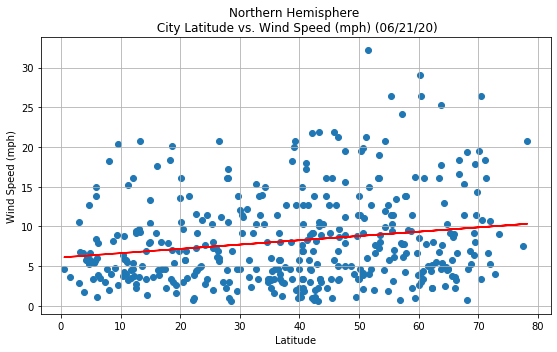

In [36]:
# Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

x_values = northhem_data["Latitude"]
y_values = northhem_data["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
title = "Northern Hemisphere \n City Latitude vs. Wind Speed (mph) (06/21/20)"
savefile = "../output_data/Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression.png"

plot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.00781
The r-squared is: 6e-05


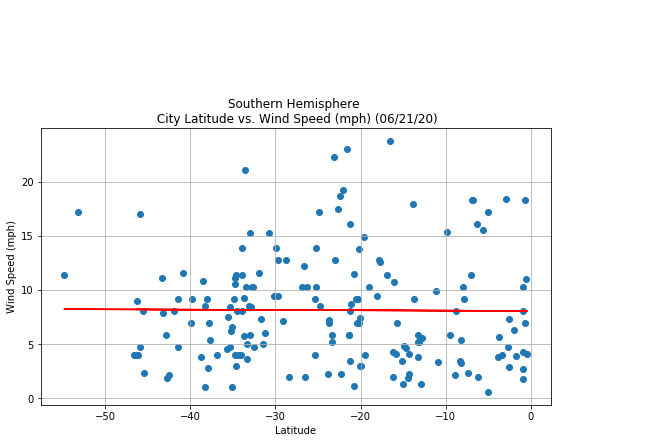

In [37]:
# Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

x_values = southhem_data["Latitude"]
y_values = southhem_data["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
title = "Southern Hemisphere \n City Latitude vs. Wind Speed (mph) (06/21/20)"
savefile = "../output_data/Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression.png"

plot(x_values, y_values)